<a href="https://colab.research.google.com/github/ArshiyaRasooli/semnanproject/blob/main/%D8%B1%D9%88%D9%86%D9%88%D8%B4%D8%AA_CT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.7 MB/s eta 0:00:00


In [ ]:
from tables import utils
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

import tensorflow.keras.layers as L
from tensorflow import keras
import scipy, sklearn
import tensorflow as tf

In [ ]:
images_path = {}
images_path["covid"] = glob("/content/drive/MyDrive/CT/COVID/*.png")
images_path["non-Covid"] = glob("/content/drive/MyDrive/CT/non-COVID/*.png")
images_class = {
    'covid' : 0,
    'non-Covid' : 1
}

print(images_path)

{'covid': ['/content/drive/MyDrive/CT/COVID/Covid (1231).png', '/content/drive/MyDrive/CT/COVID/Covid (147).png', '/content/drive/MyDrive/CT/COVID/Covid (205).png', '/content/drive/MyDrive/CT/COVID/Covid (246).png', '/content/drive/MyDrive/CT/COVID/Covid (1225).png', '/content/drive/MyDrive/CT/COVID/Covid (213).png', '/content/drive/MyDrive/CT/COVID/Covid (202).png', '/content/drive/MyDrive/CT/COVID/Covid (148).png', '/content/drive/MyDrive/CT/COVID/Covid (231).png', '/content/drive/MyDrive/CT/COVID/Covid (230).png', '/content/drive/MyDrive/CT/COVID/Covid (171).png', '/content/drive/MyDrive/CT/COVID/Covid (276).png', '/content/drive/MyDrive/CT/COVID/Covid (266).png', '/content/drive/MyDrive/CT/COVID/Covid (203).png', '/content/drive/MyDrive/CT/COVID/Covid (215).png', '/content/drive/MyDrive/CT/COVID/Covid (271).png', '/content/drive/MyDrive/CT/COVID/Covid (272).png', '/content/drive/MyDrive/CT/COVID/Covid (156).png', '/content/drive/MyDrive/CT/COVID/Covid (264).png', '/content/drive/My

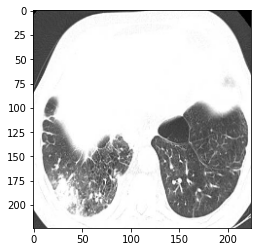

In [ ]:
X = []
Y = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])

plt.imshow(X[0])
plt.show()

In [ ]:
x = np.array(X)
y = np.array(Y)

pre_trained_models = {}

In [ ]:
from keras.applications.densenet import DenseNet201
pre_trained_models["DenseNet201"] = DenseNet201(include_top=False, input_shape=(224, 224, 3), pooling="avg")

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
from keras.applications.vgg19 import VGG19
pre_trained_models["VGG19"] = VGG19(include_top=False, input_shape=(224, 224, 3), pooling="avg")

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for j in pre_trained_models.keys():
  for layer in pre_trained_models[j].layers:
    layer.trainable = False

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train1 = pre_trained_models["DenseNet201"].predict(X_train)
X_test1 = pre_trained_models["DenseNet201"].predict(X_test)

24/24 [==============================] - 154s 6s/step


In [ ]:

X_train2 = pre_trained_models["VGG19"].predict(X_train)
X_test2 = pre_trained_models["VGG19"].predict(X_test)

24/24 [==============================] - 465s 19s/step


In [ ]:
X_train = np.append(X_train1, X_train2, axis=1)
X_test = np.append(X_test1,X_test2, axis=1)

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
Classifier = XGBClassifier(learning_rate = 0.2, n_estimators = 150, random_state= 0, gamma= 0, seed=0, depth = 7, silent = True)
Classifier.fit(X_train, Y_train)

XGBClassifier(depth=7, learning_rate=0.2, n_estimators=150, seed=0, silent=True)

In [ ]:
Y_pred = Classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.9624161073825503


In [ ]:
print("Accuracy score : ", accuracy_score(Y_test, Y_pred))
print("mean_squared_error : ", mean_squared_error(Y_test, Y_pred))
print("r2_score : ", r2_score(Y_test, Y_pred))
print("f1_score : ", f1_score(Y_test, Y_pred))
print("precision_score: ", precision_score(Y_test, Y_pred))
print("recall_score : ", recall_score(Y_test, Y_pred))

Accuracy score :  0.9624161073825503
mean_squared_error :  0.03758389261744966
r2_score :  0.8496316479967707
f1_score :  0.9620596205962059
precision_score:  0.9568733153638814
recall_score :  0.9673024523160763


In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, Y_pred)

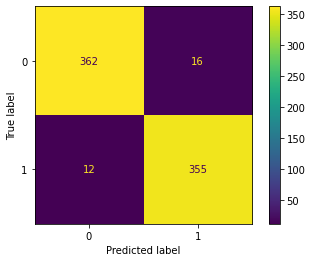

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

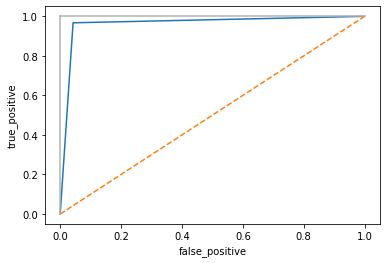

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

fp_rate3, tp_rate3, trsh3 = roc_curve(Y_test, Y_pred)
plt.plot(fp_rate3, tp_rate3)
plt.plot([0, 1], ls='--')
plt.plot([0,0], [1, 0], c = '0.7')
plt.plot([1, 1], c = '0.7')
plt.ylabel("true_positive")
plt.xlabel("false_positive")
plt.show()